In [7]:
import mysql.connector
import pandas as pd
import pandas.io.sql as psql
import itertools
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [8]:
class Pairs:
    def __init__(self):
        self._cnx = mysql.connector.connect(user='xxx', password='xxx', database='pairs')
        self._cursor = self._cnx.cursor()

In [9]:
p = Pairs()

In [19]:
user = psql.read_sql("select users.good, vision.label1, vision.label2, vision.label3, vision.label4, vision.label5, vision.label6, vision.label7, vision.label8, vision.label9, vision.label10 from users, vision where users.id = vision.id;", p._cnx)

[Text(0,0,'girl'),
 Text(0,0,'product'),
 Text(0,0,'forehead'),
 Text(0,0,'hairstyle'),
 Text(0,0,'chin'),
 Text(0,0,'nose'),
 Text(0,0,'cheek'),
 Text(0,0,'black hair'),
 Text(0,0,'smile'),
 Text(0,0,'human hair color'),
 Text(0,0,'eyebrow'),
 Text(0,0,'sky'),
 Text(0,0,'food'),
 Text(0,0,'face'),
 Text(0,0,'fun'),
 Text(0,0,'long hair'),
 Text(0,0,'dish'),
 Text(0,0,'cuisine'),
 Text(0,0,'hair'),
 Text(0,0,'tree')]

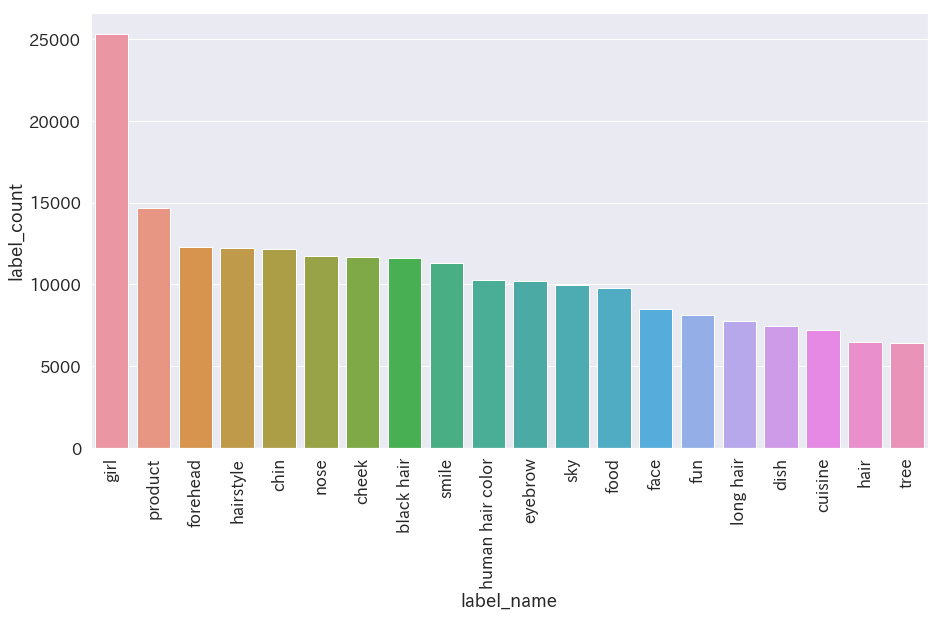

In [20]:
df_label_count = user.loc[:, "label1" : "label10"].stack().reset_index()
df_label_count = df_label_count.rename(columns={0: 'label_name'})
df_label_count = df_label_count.groupby(['label_name']).size().reset_index()
df_label_count = df_label_count.rename(columns={0: 'label_count'})
df_label_count = df_label_count[df_label_count['label_name'] != ""]
df_label_count = df_label_count.sort_values(["label_count"], ascending=[False])
user = user.rename(columns={0: 'label_name', 1: 'label_count'})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="label_name", y="label_count", data=df_label_count.head(20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [21]:
combinations_2 = []
for i, row in user.iterrows():
    row = row.tolist()
    row = [x for x in row if x]
    row = sorted(row)
    label_combi_2 = list(itertools.combinations(row, 2))
    combinations_2.extend(label_combi_2)
c2 = collections.Counter(combinations_2)
c2 = sorted(c2.items(), key=lambda x: -x[1])
df = pd.DataFrame(c2)
df = df.rename(columns={0: 'combination', 1: 'count'})

[Text(0,0,"('chin', 'forehead')"),
 Text(0,0,"('black hair', 'girl')"),
 Text(0,0,"('cheek', 'nose')"),
 Text(0,0,"('cheek', 'chin')"),
 Text(0,0,"('chin', 'eyebrow')"),
 Text(0,0,"('cheek', 'forehead')"),
 Text(0,0,"('girl', 'product')"),
 Text(0,0,"('cheek', 'eyebrow')"),
 Text(0,0,"('eyebrow', 'forehead')"),
 Text(0,0,"('girl', 'smile')"),
 Text(0,0,"('chin', 'nose')"),
 Text(0,0,"('eyebrow', 'nose')"),
 Text(0,0,"('forehead', 'hairstyle')"),
 Text(0,0,"('forehead', 'nose')"),
 Text(0,0,"('face', 'nose')"),
 Text(0,0,"('girl', 'hairstyle')"),
 Text(0,0,"('chin', 'hairstyle')"),
 Text(0,0,"('hairstyle', 'human hair color')"),
 Text(0,0,"('dish', 'food')"),
 Text(0,0,"('cuisine', 'food')")]

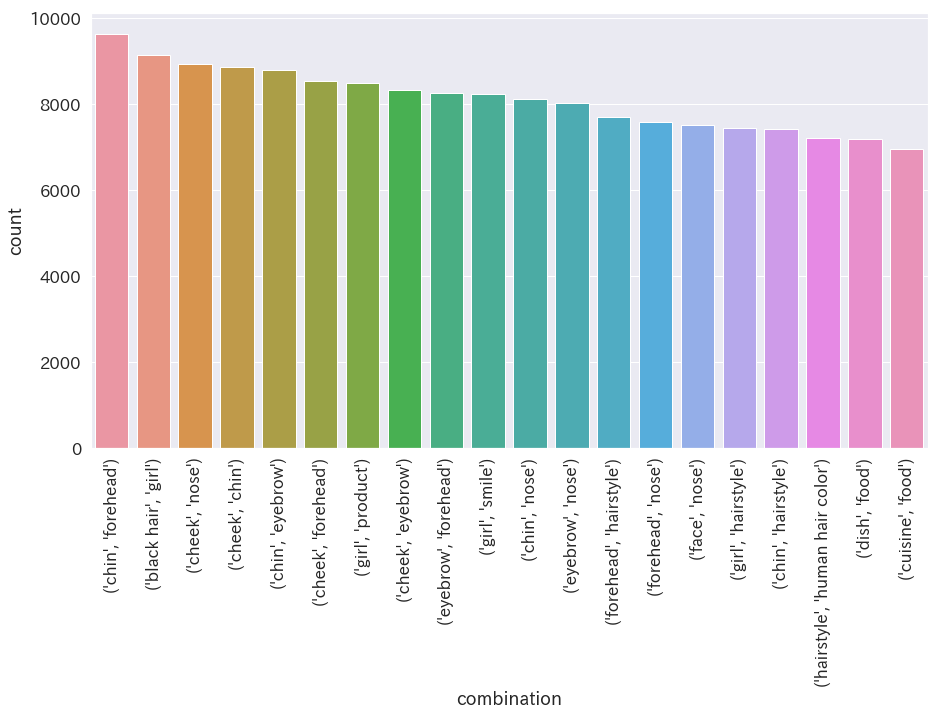

In [22]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="combination", y="count", data=df.head(20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [23]:
food_list = ['kobe beef', 'steak', 'baked goods', 'baking', 'appetizer', 'animal source foods', 'beef', 'fast food', 'junk food', 'chinese food', 'recipe', 'meat', 'sirloin steak', "vegetarian food", "asian food",  "brunch", "breakfast", "eating", "lunch", "dish", "food", "cuisine", "meal"]
color_list = ["blue", "purple", "yellow", "pink"]
human_list = ['bangs', 'bob cut', 'abdomen', 'trunk', "arm", 'leg', 'thigh', "girl", "child", "skin", "european shorthair", "joint", "hand", "shoulder", "eye", "girl", "eyebrow", "cheek", "chin", "hair", "blond", "black_hair", "lip", "nose", "brown hair", "forehead", "face", "hairstyle", "long hair", "black hair", "neck", "human hair color", "head", "person", "hair coloring", "lady", "mouth"]
other_list = ["play", "road", "heart", "love", "infrastructure", "street", 'public space', "evening", "morning", "neighbourhood", 'pedestrian', "pattern", 'water resources', 'watercourse', "water", "material", "day", "daytime", "snapshot", "beauty", "dairy product", "textile", "product"]
geometry_list = ['marine biology', 'boat', 'water transportation', 'coral reef fish', 'marine biology', 'coral reef', 'reef', 'arecales', 'palm tree', 'bay', 'promontory', 'body of water', 'caribbean', "afterglow", "cape", "promontry", "sea", "beach", "ocean", "sky", "coast", "shore", "cloud", "horizon", "dawn", "sunrise", "sunset"]
fashion_list = ['sleeve', 'dress', 'gown', 'footwear', 'shoe', 'fashion accessory', 'hair accessory', "cap", "knit cap", "coastal and oceanic landforms", "glasses", "vision care", "clothing", "outerwear", "headgear", "hat", "eyewear", "sunglasses"]
plant_list = ['hydrangea', 'hydrangeaceae', 'garden', 'shrub', 'rose', 'rose family', "wood", 'floral design', 'floristry', 'cut flowers', 'flower bouquet', 'flowering plant', 'cherry blossom', "grass", "wood", "flower arranging", "leaf", "grass", "plant", "flower", "tree", "branch", "blossom", "flora", "organ"]
animal_list = ['marine mammal', 'whales dolphins and porpoises', 'beak', 'bird', 'miniature poodle', 'toy poodle', 'domestic short haired cat', 'tabby cat', 'rabbit', 'rabits and hares', "fur", 'carnivoran', 'puppy', 'mammal', 'vertebrate', "fauna", 'kitten', 'whiskers', "dog", "cat", "dog breed", "dog like mammal", 'cat like mammal', 'small to medium sized cats','dog breed group', 'snout']
emotion_list = ["calm", "cool", 'emotion', 'facial expression', "fun", "happiness", "smile"]
sweets_list = ['freezing', 'ice', 'strawberries', 'strawberry', 'gelato', 'ice cream', 'buttercream', 'cake', 'cake decorating', 'torte', 'cream', 'whipped cream', 'dessert', 'frozen dessert']
cafe_list = ["drinkware", 'café au lait', 'cappuccino', 'caffè macchiato', 'coffee', 'coffee cup', 'cup']
vacation_list = ["vacation", "leisure", "tourism", "travel", "recreation", 'landmark', 'tourist attraction']
city_list = ["town", 'cityscape', 'metropolitan area', 'skyscraper', 'urban area', 'city', 'metropolis']
mountain_list = ['mountain range', 'ridge', 'mountain', 'mountainous landforms', "lighting"]
drink_list = ['stemware', 'wine glass', "drinkware", 'bottle', 'glass bottle', 'alcohol', 'liqueur', 'alcoholic beverage', "drink", "beer"]
nature_list = ["geological phenomenon", 'hill station', 'mount scenery', 'highland', 'hill', 'lake', 'reservoir', "field", 'geology', 'rock', 'nature', 'nature reserve', 'river', 'waterway', "ecosystem", "underwater", "reflection", "snow", 'forest', 'rainforest']
building_list = ['medieval architecture', 'place of worship', 'shinto shrine', 'shrine', 'spire', 'tower', 'interior design', 'room', "structure", "home", "house", "window", 'floor', 'flooring', 'historic site', 'temple', "building", 'furniture', 'table']
vehicle_list = ["car", "vehicle"]
mascot_list = ['plush', 'stuffed toy', "toy"]
sport_list = ["sports", 'soccer specific stadium', 'sport venue', "stadium"]
season_list = ["spring", "summer", "winter"]
nail_list = ["finger", "nail", 'artificial nails', 'manicure']
art_list = ['art', 'mural']
entertaiment_list = ["balloon", "fireworks", 'adventure', 'outdoor recreation', "event", "crowd", "festival", "entertainment", "stage", 'amusement park', 'amusement ride']
darkness_list = ["night", "darkness"]
sculpture_list = ["sculpture", "statue"]
airtravel_list = ["air travel"]
christmas_list = ["christmas", 'christmas decoration', 'decor']
instrument_list = ["plucked string instruments", 'string instrument', 'musical instrument']
costume_list = ['costume', 'kimono', 'geisha', 'tradition']
friend_list = ["friendship"]

In [24]:
df_except_human = pd.DataFrame()
for v in c2:
    if len((set(v[0]) & set(human_list))) > 0:
        continue
    df_except_human = df_except_human.append([[str(v[0]), v[1]]])
df_except_human = df_except_human.rename(columns={0: 'combination', 1: 'count'})

[Text(0,0,"('dish', 'food')"),
 Text(0,0,"('cuisine', 'food')"),
 Text(0,0,"('cuisine', 'dish')"),
 Text(0,0,"('food', 'meal')"),
 Text(0,0,"('product', 'smile')"),
 Text(0,0,"('dish', 'meal')"),
 Text(0,0,"('cuisine', 'meal')"),
 Text(0,0,"('plant', 'tree')"),
 Text(0,0,"('sea', 'sky')"),
 Text(0,0,"('fun', 'product')"),
 Text(0,0,"('flower', 'plant')"),
 Text(0,0,"('eating', 'food')"),
 Text(0,0,"('fun', 'smile')"),
 Text(0,0,"('food', 'lunch')"),
 Text(0,0,"('asian food', 'food')"),
 Text(0,0,"('asian food', 'dish')"),
 Text(0,0,"('cuisine', 'lunch')"),
 Text(0,0,"('asian food', 'cuisine')"),
 Text(0,0,"('lunch', 'meal')"),
 Text(0,0,"('dish', 'lunch')")]

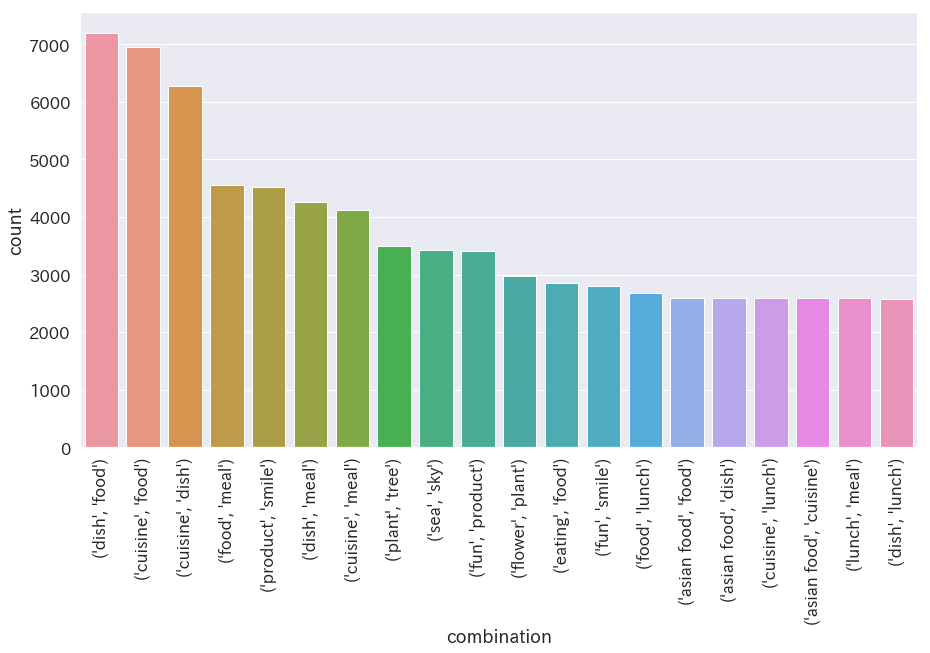

In [25]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="combination", y="count", data=df_except_human.head(20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)